# Data Mining Project 1st Semester 2020/2021

## 1) Introduction

### 1.1) An Understanding

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before. The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago. Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors. This is very important to do so because it will help to recapture the group of "lapsed donors".

This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ). It was also created a Trello Chart to better understand the tasks that had to be done, as well as the more demanding tasks and to divide the work for the members. (Trello: https://trello.com/b/UswFQo7V/data-mining)

### 1.2) Setting up Enviroments in Anaconda 

As this project requires specific libraries and packages previously installed, before running the notebook, so that there aren't any external problems, an enviroment in anaconda was created to run this notebook without any problems. The enviroment file is provided in the github previously referred, as a yml file, then the user will have to download it and run some commands in the anaconda command line...........................................................

### 1.3) Package Importing

In [250]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

## 2) Importing, Acessing and Cleaning the Data

The model that was followed to develop this project was the KDD Process (Knowledge Discovery Database).

In this phase of the Data Mining Process, it is going to be created a target dataset, which then is going to be discovered. Following this, some processes of data cleaning and preprocessing are going to be applied, such as removing noise, nans variables, data normalization, collecting only the necessary information to apply the next processes. Afterwards, data reduction and projection is going to be applied, finding useful features (with feature engeneering) to represent the data in smaller subsets, dimensionality reduction and/or transformation methods.

Also, along all this processes some data visualization is going to be applied to better understand the data that we are working with.

### 2.1) Reading the Data

In [284]:
#ver se não se consegue por o ficheiro na git, é demasiado grande acho...
data_original=pd.read_csv("../donors.csv")

C:\Users\Madal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [285]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### 2.2) Make a copy of the original dataset


In [286]:
data = data_original.copy()

In [287]:
data.shape

(95412, 476)

In [288]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [289]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [290]:
# count of missing values
data.isna().sum().sum()

5158884

In [291]:
# duplicated observations
data.duplicated().sum()

0

### 2.3) Normalize Some Values and replacing empty String for Nans

In [292]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In [294]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [295]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

### 2.4) Dropping Columns with High percentege of missing values

In [296]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [297]:
data.shape

(95412, 401)

### 2.5) Data Selection

In [319]:
# 13 variaveis
value = ["RAMNTALL","NGIFTALL","LASTGIFT",
         "AVGGIFT","NUMPRM12","MAJOR","GENDER","STATE","INCOME","DOB"]

In [320]:
cluster_value=data[value]
cluster_value.head()

,RAMNTALL,NGIFTALL,LASTGIFT,AVGGIFT,NUMPRM12,MAJOR,GENDER,STATE,INCOME,DOB
0,240.0,31,10.0,7.741935,14,0,F,IL,NaN,1957-12-01
1,47.0,3,25.0,15.666667,13,0,M,CA,6.0,1972-02-01
2,202.0,27,5.0,7.481481,14,0,M,NC,3.0,NaN
3,109.0,16,10.0,6.812500,14,0,F,CA,1.0,1948-01-01
4,254.0,37,15.0,6.864865,25,0,F,FL,3.0,1940-01-01


### 2.6) Feature Engineering

In [300]:
cluster_value["Region"]=cluster_value.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
cluster_value.Region.replace(['TX','OK','AR','LA','MS','TN','KY','WV','VA','DE','MD','DC','NC','SC','GA','FL','AL'],'South',inplace=True)
cluster_value.Region.replace(['KS','NE','SD','ND','MO','IA','MN','IL','WI','IN','OH','MI'],'MidWest',inplace=True)
cluster_value.Region.replace(['PA','NJ','CT','RI','MA','NY','VT','NH','ME'],'NorthEast',inplace=True)

<ipython-input-300-59ce22511119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_value["Region"]=cluster_value.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
C:\Users\Madal\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [301]:
cluster_value["Region"].unique()

array(['MidWest', 'West', 'South', 'NM', 'AP', 'AA', 'NorthEast', 'AE',
       'GU', 'AS', 'VI'], dtype=object)

In [302]:
cluster_value.Region.replace(['NM','AP','AA','AE','GU','AS','VI'],np.nan,inplace=True)

In [303]:
cluster_value["DOB"]=cluster_value['DOB'].str.split("-",expand=True)
cluster_value["DOB"] = pd.to_numeric(cluster_value["DOB"],downcast='integer')
cluster_value["AGE"]= datetime.now().year - cluster_value["DOB"]

<ipython-input-303-cb926801abf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_value["DOB"]=cluster_value['DOB'].str.split("-",expand=True)
<ipython-input-303-cb926801abf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_value["DOB"] = pd.to_numeric(cluster_value["DOB"],downcast='integer')
<ipython-input-303-cb926801abf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [304]:
cluster_value.drop(["DOB","STATE"],axis=1,inplace=True)

C:\Users\Madal\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 2.7) Feature Grouping

In [305]:
data_corr = cluster_value.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

0

In [306]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [307]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [308]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [309]:
for c in correlated_group:
    print(c)

### 2.8) Fill missing values (Data imputation)

In [321]:
categorical = cluster_value.select_dtypes(include="object").columns.to_list()
numerical = cluster_value.columns.drop(categorical).to_list()

In [322]:
# Creating a copy to apply central tendency measures imputation
cluster_value_central = cluster_value.copy()

In [323]:
modes = cluster_value_central[categorical].mode().loc[0]
cluster_value_central.fillna(modes, inplace=True)
cluster_value_central.isna().sum()  # checking how many NaNs we still have

RAMNTALL        0
NGIFTALL        0
LASTGIFT        0
AVGGIFT         0
NUMPRM12        0
MAJOR           0
GENDER          0
STATE           0
INCOME      21286
DOB             0
dtype: int64

In [324]:
# KNNImputer - only works for numerical varaibles
imputer = KNNImputer(n_neighbors=5, weights="uniform")
cluster_value_central[numerical] = imputer.fit_transform(cluster_value_central[numerical])

In [325]:
# count of missing values
cluster_value_central.isna().sum()

RAMNTALL    0
NGIFTALL    0
LASTGIFT    0
AVGGIFT     0
NUMPRM12    0
MAJOR       0
GENDER      0
STATE       0
INCOME      0
DOB         0
dtype: int64

In [219]:
cluster_value = cluster_value_central.copy()

### ANOVA

### 2.9) Outlier Removal

In [220]:
data_out = cluster_value.copy()
data_out.shape

(95412, 19)

In [221]:
ql = data_out.quantile(.5)
qh = data_out.quantile(.95)
iqr = (qh - ql)

#podia-se fazer a visualizacao dos outliers com a box plot...

upper_lim = qh + 1.5 * iqr
lower_lim = ql - 1.5 * iqr

filters = []
for metric in numerical:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_out[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
data_out = cluster_value[filters]
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_out.shape[0] / cluster_value.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 45.205 %


In [222]:
data_out.shape

(52281, 19)

In [37]:
from sklearn.cluster import DBSCAN

#outlier_detection = DBSCAN(min_samples = 2, eps = 1000)
#clusters = outlier_detection.fit_predict(data_out[numerical])
#list(clusters).count(-1)

In [38]:
#print(data_original.shape[0]-list(clusters).count(-1))

In [39]:
#data_out.shape

In [40]:
#set(clusters)

### 2.10) OHC

In [194]:
df_ohc = cluster_value.copy()

In [195]:
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
df_ohc

,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,Region_MidWest,Region_NorthEast,Region_South,Region_West,RAMNTALL,NGIFTALL,LASTGIFT,AVGGIFT,NUMPRM12,MAJOR,INCOME,AGE
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,240.0,31.0,10.0,7.741935,14.0,0.0,3.4,63.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,47.0,3.0,25.0,15.666667,13.0,0.0,6.0,48.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,202.0,27.0,5.0,7.481481,14.0,0.0,3.0,71.6
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,109.0,16.0,10.0,6.812500,14.0,0.0,1.0,72.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,254.0,37.0,15.0,6.864865,25.0,0.0,3.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,25.0,1.0,25.0,25.000000,12.0,0.0,4.4,56.2
95408,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20.0,1.0,20.0,20.000000,8.0,0.0,7.0,50.0
95409,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,58.0,7.0,10.0,8.285714,17.0,0.0,4.4,62.0
95410,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,498.0,41.0,18.0,12.146341,31.0,0.0,7.0,60.0


In [196]:
cluster_value = df_ohc.copy()

### 2.11) Data Standardization

In [197]:
standard=StandardScaler().fit(cluster_value).transform(cluster_value)

### 2.12) Defining the number of clusters using K-Means

In [198]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [199]:
range_clusters = range(1, 11)
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(standard)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

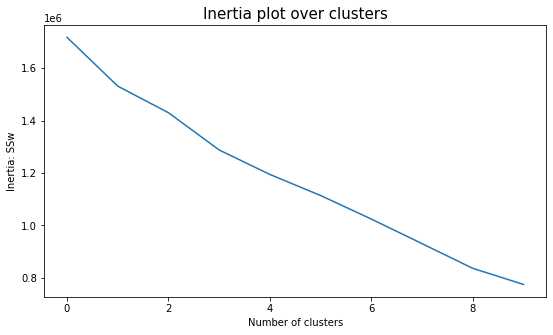

In [200]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

import matplotlib.cm as cm
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range(2,5):
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(standard)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(standard, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(standard, cluster_labels)

### 2.13) Hierarchical Clustering

In [1]:
# nao resulta em data set grandes

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
# 2 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
#hc4_labels = hc4lust.fit_predict(standard)

### 2.14) K-Means

In [201]:
number_clusters = 3
kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=1)
km_labels = kmclust.fit_predict(standard)
km_labels

array([1, 0, 2, ..., 1, 0, 0])

In [202]:
# Characterizing the final clusters
df_concat = pd.concat((cluster_value, pd.Series(km_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

,GENDER_A,GENDER_C,GENDER_F,GENDER_J,GENDER_M,GENDER_U,Region_MidWest,Region_NorthEast,Region_South,Region_West,RAMNTALL,NGIFTALL,LASTGIFT,AVGGIFT,NUMPRM12,MAJOR,INCOME,AGE
labels,,,,,,,,,,,,,,,,,,
0,0.000064,0.000032,0.573681,0.003790,0.402975,0.019459,0.000318,0.006847,0.000318,0.992516,109.179783,9.249658,18.374339,14.364752,12.974713,0.004331,4.066034,61.781534
1,0.000000,0.000000,0.561895,0.003151,0.419536,0.015418,1.000000,0.000000,0.000000,0.000000,105.132741,10.335434,16.524196,12.545127,12.866757,0.002476,3.676135,61.831023
2,0.000000,0.000027,0.568652,0.004337,0.408433,0.018552,0.000000,0.000000,1.000000,0.000000,100.087628,9.374836,16.984130,13.065777,12.750930,0.002463,3.849075,61.150277


### Correlation Matrix

In [326]:
cluster_value_features = cluster_value.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

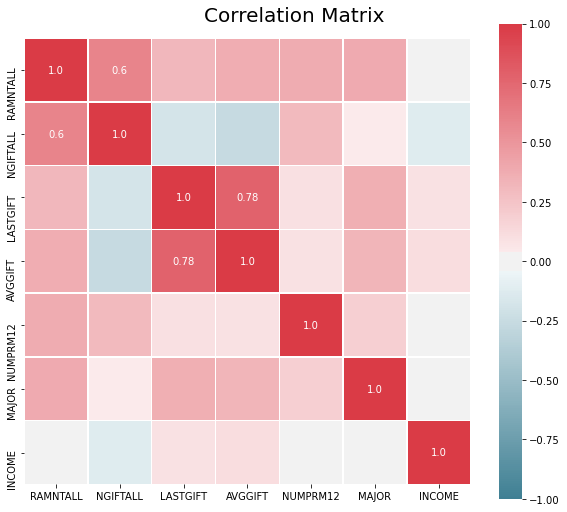

In [327]:
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[cluster_value_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()